# Prior estimation

In [50]:
include("src/main.jl")
OPTCONFIG=OptConfig(XTOLABS=1e-8, DEBUG=true);

In [51]:
# enable pyplot-latex
PyCall.PyDict(PyPlot.matplotlib["rcParams"])["text.usetex"] = true

true

## The Model

In [52]:
# exponential
xlims = (0,4)
n = 200 # was 500
ndata = 100
σ = 0.3
prior = Truncated(MixtureModel([Normal(mu, .5) for mu in [1, 3]]), xlims...)


t    = Transformation(x->exp(x), x->log(x))

Transformation(#299, #300)

In [83]:
randseed=90
srand(randseed)
#srand(2)
m = FEModel(f=x->x, xs=linspace(xlims...,n), σ=σ)
d = generatedata(m, prior, ndata);
mt   = transformmodel(m, t)

FEModel(ft, 1.0:0.2693374373524836:54.598150033144236, 0.3)

In [84]:
ncv = 20
kfold = length(d);

In [85]:
lims = ([0,4],[0,.6],[1,55], [0,.2])

([0, 4], [0.0, 0.6], [1, 55], [0.0, 0.2])

## Results

In [86]:
figsize=(4,3)

(4, 3)

 62

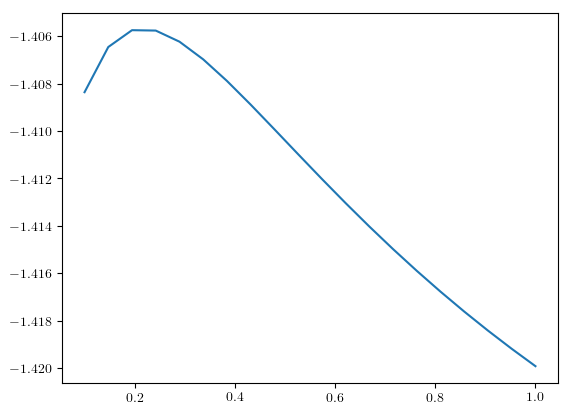

.674891 seconds (168.39 M allocations: 157.374 GiB, 23.31% gc time)


0.19473684210526315

In [87]:
## er estimator
regs = [ReferenceRegularizer(m, γ) for γ in linspace(0.1,1,ncv)]
@time ss = [cvscore(m, d, d->ebprior(m, d, r), kfold) for r in regs]
plot([r.γ for r in regs], ss)
regR = regs[indmax(ss)].γ

 82

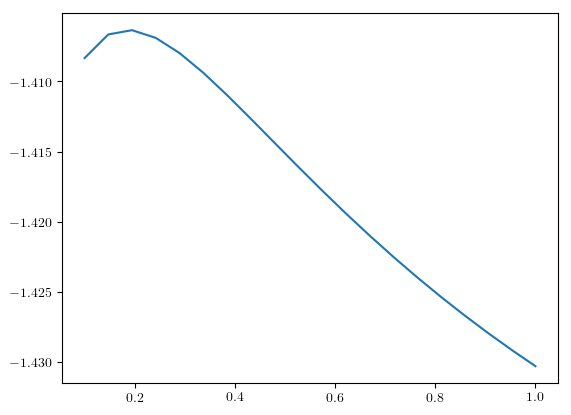

.649759 seconds (174.19 M allocations: 207.067 GiB, 23.68% gc time)


0.19473684210526315

In [88]:
## er estimator transformed
regs = [ReferenceRegularizer(mt, γ) for γ in linspace(0.1,1,ncv)]
@time ss = [cvscore(mt, d, d->ebprior(mt, d, r), kfold) for r in regs]
plot([r.γ for r in regs], ss)
regRt = regs[indmax(ss)].γ

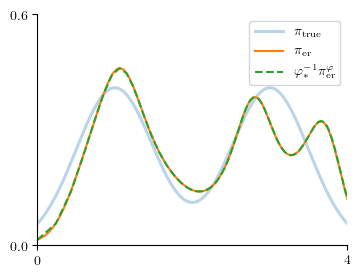

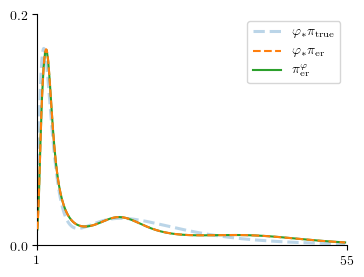

(PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x7f340b60ab90>), PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x7f340b606ed0>))

In [89]:
wR  = ebprior(m,  d, ReferenceRegularizer(m,  regR))
wRt = ebprior(mt, d, ReferenceRegularizer(mt, regRt))

p1, p2 = compareplot(m, t, pdf.(prior, m.xs), wR, wRt, "er", lims...; figsize=figsize, savename="eb$randseed")

121.

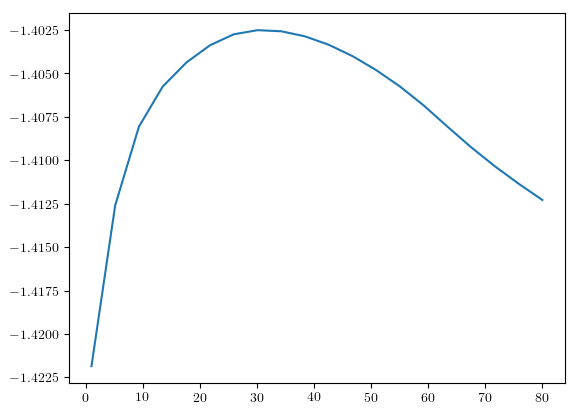

178899 seconds (175.05 M allocations: 324.851 GiB, 24.62% gc time)


30.105263157894736

In [90]:
## thik estimator
regs = [ThikonovRegularizer(γ) for γ in linspace(1,80,ncv)]
@time ss = [cvscore(m, d, d->ebprior(m, d, r), kfold) for r in regs]
plot([r.γ for r in regs], ss)
regT = regs[indmax(ss)].γ

106.

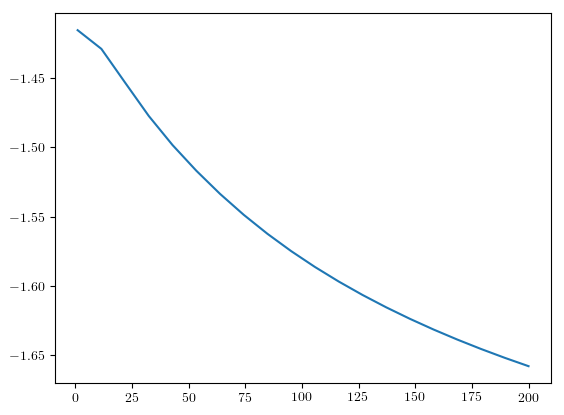

877546 seconds (173.99 M allocations: 231.322 GiB, 20.81% gc time)


1.0

In [91]:
## thik estimator transformed
regs = [ThikonovRegularizer(γ) for γ in linspace(1,200,ncv)]
@time ss = [cvscore(mt, d, d->ebprior(mt, d, r), kfold) for r in regs]
plot([r.γ for r in regs], ss)
regTt = regs[indmax(ss)].γ

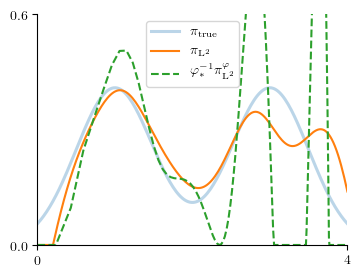

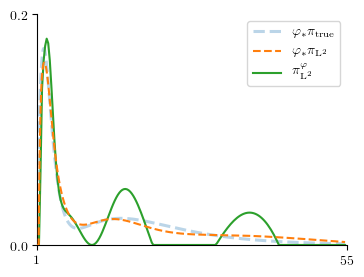

(PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x7f343a031d10>), PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x7f3434d131d0>))

In [92]:
wT = ebprior(m,  d, ThikonovRegularizer(regT))
wTt = ebprior(mt, d, ThikonovRegularizer(regTt))

compareplot(m, t, pdf.(prior, m.xs), wT, wTt, "L^2", lims...; figsize=figsize, savename="l2$randseed")

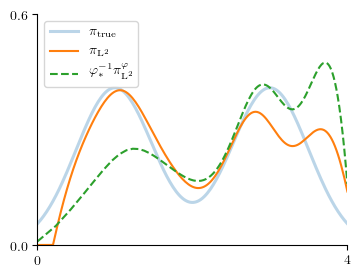

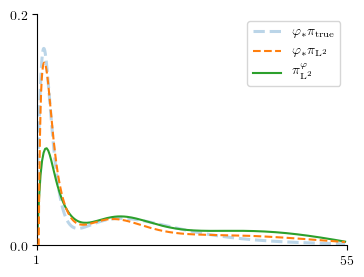

(PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x7f33e2d5e950>), PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x7f33e1c4a150>))

In [93]:
wT = ebprior(m,  d, ThikonovRegularizer(regT))
wTto = ebprior(mt, d, ThikonovRegularizer(regT))

compareplot(m, t, pdf.(prior, m.xs), wT, wTto, "L^2", lims...; figsize=figsize, savename="l2gammafix$randseed")